<a href="https://colab.research.google.com/github/Guliko24/NetZoo_network/blob/main/GRN_21_MCF7_vs_MDA-MB231_BrCA_TF_list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#import all the packages as needed
import pandas as pd
import networkx as nx

In [48]:
# prompt: let's load Gdrive onto notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Navigate to your Google Drive files
%cd /content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


# **Let's load the data from Grand Database. df_gene_expression is taken from CCLE expression within sample file, where I chose ACH-000019 (MCF7) and ACH000768 (MDA-MB231)**

df_MCF7_Tf_genes is a matrix for MCF7 cells consisting of TF-gene interaction with edge weights

df_MDA_MB231_TF_genes is a matrix for MDA_MB231 cells with TF-gene interaction with edge weights


In [50]:
#let's read the MCF7_TF_Genes dataset and make changes
df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)
df_MDA_MB231_TF_Genes=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000768.csv', index_col=0)
#df_gene_expression=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/CCLE_expression_withinSample.csv', index_col=0)
#

In [51]:
#let's do initial data assessment
#df_MCF7_TF_Genes.head()


In [52]:
#df_MDA_MB231_TF_Genes.head()

In [53]:
#let's filter out two cell lines MCF=ACH-000019 and MDA=ACH-000768
import pandas as pd

# Load the gene expression file
# Replace 'gene_expression.csv' with the path to your file

data=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/CCLE_expression_withinSample.csv', index_col=0)
# Specify the two cell lines to keep
cell_lines_to_keep = ['ACH-000019', 'ACH-000768']

# Filter columns to keep only the specified cell lines
filtered_gene_expression = data[cell_lines_to_keep]

# Save the filtered data to a new file (optional)
filtered_gene_expression.to_csv('MCF7_MDA_gene_expression.csv', index=True)




In [54]:
import pandas as pd
import numpy as np

# Assuming 'filtered_gene_expression' has two columns: 'ACH-000019' and 'ACH-000768'

# Make a copy to avoid SettingWithCopyWarning
filtered_gene_expression = filtered_gene_expression.copy()

# Calculate fold change (ACH-000768 / ACH-000019)
filtered_gene_expression.loc[:, 'fold_change'] = (
    filtered_gene_expression['ACH-000768'] / filtered_gene_expression['ACH-000019']
)

# Replace infinite values with NaN and drop them
filtered_gene_expression.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where fold_change is NaN
filtered_gene_expression.dropna(subset=['fold_change'], inplace=True)

# Calculate log2 fold change
filtered_gene_expression.loc[:, 'log2_fold_change'] = np.log2(filtered_gene_expression['fold_change'])

# Debug: Check the intermediate DataFrame
print("After fold change calculation:\n", filtered_gene_expression.head())

# Filter for significant fold changes (e.g., fold_change > 2 or < 0.5)
significant_genes_grand_database = filtered_gene_expression[
    (filtered_gene_expression['fold_change'] > 2) | (filtered_gene_expression['fold_change'] < 0.5)
]

# Debug: Check if there are any significant genes
import pandas as pd
import numpy as np

# Assuming 'filtered_gene_expression' has two columns: 'ACH-000019' and 'ACH-000768'

# Make a copy to avoid SettingWithCopyWarning
filtered_gene_expression = filtered_gene_expression.copy()

# Calculate fold change (ACH-000768 / ACH-000019)
filtered_gene_expression.loc[:, 'fold_change'] = (
    filtered_gene_expression['ACH-000768'] / filtered_gene_expression['ACH-000019']
)

# Replace infinite values with NaN and drop them
filtered_gene_expression.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where fold_change is NaN
filtered_gene_expression.dropna(subset=['fold_change'], inplace=True)

# Calculate log2 fold change
filtered_gene_expression.loc[:, 'log2_fold_change'] = np.log2(filtered_gene_expression['fold_change'])

# Debug: Check the intermediate DataFrame
print("After fold change calculation:\n", filtered_gene_expression.head())

# Filter for significant fold changes (e.g., fold_change > 2 or < 0.5)
significant_genes_grand_database = filtered_gene_expression[
    (filtered_gene_expression['fold_change'] > 2) | (filtered_gene_expression['fold_change'] < 0.5)
]

# Debug: Check if there are any significant genes
print("Significant genes:\n", significant_genes_grand_database.head())

After fold change calculation:
           ACH-000019  ACH-000768  fold_change  log2_fold_change
TSPAN6     10.202802   11.031839     1.081256          0.112708
TNMD        7.801777    7.801777     1.000000          0.000000
DPM1       12.930274   11.814957     0.913744         -0.130138
SCYL3      10.525537   10.149789     0.964301         -0.052444
C1orf112   10.247321   11.429073     1.115323          0.157462
After fold change calculation:
           ACH-000019  ACH-000768  fold_change  log2_fold_change
TSPAN6     10.202802   11.031839     1.081256          0.112708
TNMD        7.801777    7.801777     1.000000          0.000000
DPM1       12.930274   11.814957     0.913744         -0.130138
SCYL3      10.525537   10.149789     0.964301         -0.052444
C1orf112   10.247321   11.429073     1.115323          0.157462
Significant genes:
 Empty DataFrame
Columns: [ACH-000019, ACH-000768, fold_change, log2_fold_change]
Index: []


# *There is no genes with fold change between ACH-000019 and ACH000-768, so let's consider another dataset*

In [55]:
import numpy as np
import pandas as pd

def normalize_matrix(matrix: pd.DataFrame) -> pd.DataFrame:
    """
    Normalize the values in the matrix to a range of [0, 1].
    """
    normalized_matrix = (matrix - matrix.min().min()) / (matrix.max().max() - matrix.min().min())
    return normalized_matrix

def filter_by_threshold(matrix: pd.DataFrame, threshold: float, mode: str = 'greater') -> pd.DataFrame:
    """
    Filter the matrix based on a threshold.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        threshold: The threshold value for filtering.
        mode: 'greater' to keep values greater than threshold, 'less' to keep values less than threshold.
    """
    if mode == 'greater':
        return matrix[matrix > threshold].fillna(0)
    elif mode == 'less':
        return matrix[matrix < threshold].fillna(0)
    else:
        raise ValueError("Mode must be either 'greater' or 'less'")

def binarize_matrix(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Binarize the matrix based on a threshold.
    Values greater than or equal to the threshold become 1, otherwise 0.
    """
    binary_matrix = (matrix >= threshold).astype(int)
    return binary_matrix

def rank_interactions(matrix: pd.DataFrame, top_n: int = 5) -> pd.DataFrame:
    """
    Rank the top N interactions for each transcription factor.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        top_n: Number of top interactions to return for each TF.
    """
    ranked_interactions = pd.DataFrame()
    for tf in matrix.index:
        top_genes = matrix.loc[tf].nlargest(top_n)
        ranked_interactions = pd.concat([ranked_interactions, top_genes], axis=1)
    return ranked_interactions.T

def aggregate_interactions(matrix: pd.DataFrame, axis: int = 0) -> pd.Series:
    """
    Aggregate interaction strengths.
    Parameters:
        axis: 0 to aggregate across genes (per TF), 1 to aggregate across TFs (per Gene).
    """
    return matrix.sum(axis=axis)

def construct_interaction_network(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Construct an interaction network by keeping only interactions above a threshold.
    Returns a DataFrame representing edges in the network.
    """
    filtered_matrix = filter_by_threshold(matrix, threshold, mode='greater')
    edges = []
    for tf in filtered_matrix.index:
        for gene in filtered_matrix.columns:
            if filtered_matrix.loc[tf, gene] > 0:
                edges.append((tf, gene, filtered_matrix.loc[tf, gene]))
    network_df = pd.DataFrame(edges, columns=['TF', 'Gene', 'Interaction_Strength'])
    return network_df

def split_positive_negative_matrices(matrix: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Split the matrix into two DataFrames: one for positive values and one for negative values.
    Ensure that the matrix values are numeric by coercing errors and replacing non-numeric values with NaN.
    Retain the index and columns in both matrices.
    """
    matrix_numeric = matrix.apply(pd.to_numeric, errors='coerce')
    positive_matrix = matrix_numeric.where(matrix_numeric > 0).fillna(0)
    negative_matrix = matrix_numeric.where(matrix_numeric < 0).fillna(0)
    positive_matrix.index = matrix.index
    positive_matrix.columns = matrix.columns
    negative_matrix.index = matrix.index
    negative_matrix.columns = matrix.columns
    return positive_matrix, negative_matrix

def check_repeated_indices_columns(matrix: pd.DataFrame):
    """
    Check for repeated transcription factors (rows) and genes (columns) in the matrix.
    """
    repeated_rows = matrix.index[matrix.index.duplicated()].unique()
    repeated_columns = matrix.columns[matrix.columns.duplicated()].unique()

    print("Repeated Rows (TFs):")
    if len(repeated_rows) > 0:
        print(repeated_rows)
    else:
        print("No repeated rows found.")

    print("\nRepeated Columns (Genes):")
    if len(repeated_columns) > 0:
        print(repeated_columns)
    else:
        print("No repeated columns found.")



In [56]:
# Example Usage
# Read the TF vs Genes matrix from a CSV file
#df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)

# Normalize the matrix
#normalized_df = normalize_matrix(df_MCF7_TF_Genes)

# Filter interactions greater than 0.5
#filtered_df = filter_by_threshold(df_MCF7_TF_Genes, threshold=0.5, mode='greater')

# Binarize the matrix with a threshold of 0.5
#binary_df = binarize_matrix(df_MCF7_TF_Genes, threshold=0.5)

# Rank top 2 interactions for each TF
#ranked_df = rank_interactions(df_MCF7_TF_Genes, top_n=2)

# Aggregate interactions across genes (per TF)
#aggregated_series = aggregate_interactions(df_MCF7_TF_Genes, axis=1)

# Construct interaction network with a threshold of 0.5
#network_df = construct_interaction_network(df_MCF7_TF_Genes, threshold=0.5)

# Split the matrix into positive and negative interaction matrices
#positive_df, negative_df = split_positive_negative_matrices(df_MCF7_TF_Genes)

# **1. Let's process the gene expression data set GSE73857 dataset for MCF7 and MDA-MB231 cells**

*the* oridinal *gene* expression count file had ENSEMBL id for genes instead of their names, so I use R studio and Biomart package to find the gene names and add as an additional column, however it seems that there are unannotated genes which we need to remove later on.
the data set also had experimental duplicates for MCF7 and triplicates for MDA-MB231 cells so I averaged them. I could have done student-T test and find significantly different genes, but I went ahead with averaging and calculating fold-change.

In [57]:
import pandas as pd

# Load RNA-seq data
df = pd.read_csv("/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/GSE73857_MCF7_MDA_gene_expression.txt", sep="\t")  # Replace with your RNA-seq file



# Step 1: Remove the `ensembl.id` column
if "ensembl.id" in df.columns:
    df.drop(columns=["ensembl.id"], inplace=True)

# Step 2: Move the `gene_name` column to be the first column
if "gene_name" in df.columns:
    gene_name_column = df.pop("gene_name")  # Remove and retrieve `gene.name` column
    df.insert(0, "gene_name", gene_name_column)  # Insert it as the first column

# Step 3: Set `gene_name` as the index
df.set_index("gene_name", inplace=True)


# Step 1: Calculate averages
MCF7_average = df.iloc[:, [0, 1]].mean(axis=1)
MDA_MB231_average = df.iloc[:, [2, 3, 4]].mean(axis=1)

# Step 2: Drop the original columns
df.drop(df.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)

# Step 3: Add the new averaged columns
df["MCF7"] = MCF7_average
df["MDA-MB231"] = MDA_MB231_average

# Step 1: Remove rows where both `MCF7` and `MDA-MB231` have zero expression
MCF7_MDA_filtered_expression = df[(df["MCF7"] != 0) | (df["MDA-MB231"] != 0)]



In [58]:
MCF7_MDA_filtered_expression.head()

,MCF7,MDA-MB231
gene_name,,
TSPAN6,494.000,1198.373333
DPM1,4458.000,2367.000000
SCYL3,851.405,406.156667
FIRRM,1408.270,1153.816667
FGR,0.000,0.333333


In [59]:
MCF7_MDA_filtered_expression.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40677 entries, TSPAN6 to nan
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MCF7       40677 non-null  float64
 1   MDA-MB231  40677 non-null  float64
dtypes: float64(2)
memory usage: 953.4+ KB


# **2. Lets check whether there are differently expressed genes between two cell line so I could narrow down my graphs, by checking the fold change:**

In [60]:
import pandas as pd
import numpy as np



# Step 1: Separate rows with zero expression for further investigation
zero_expression_genes = MCF7_MDA_filtered_expression[
    (MCF7_MDA_filtered_expression['MCF7'] == 0) | (MCF7_MDA_filtered_expression['MDA-MB231'] == 0)
].copy()

# Save genes with zero expression to a new file
zero_expression_genes.to_csv("zero_expression_genes.tsv", sep="\t", index=False)

# Step 2: Filter out rows with zero expression from the original DataFrame
MCF7_MDA_filtered_expression_no_zeros = MCF7_MDA_filtered_expression[
    (MCF7_MDA_filtered_expression['MCF7'] != 0) & (MCF7_MDA_filtered_expression['MDA-MB231'] != 0)
].copy()

# Step 3: Calculate fold change and log2 fold change
MCF7_MDA_filtered_expression_no_zeros['fold_change'] =MCF7_MDA_filtered_expression_no_zeros['MDA-MB231'] / MCF7_MDA_filtered_expression_no_zeros['MCF7']
MCF7_MDA_filtered_expression_no_zeros.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
MCF7_MDA_filtered_expression_no_zeros.dropna(subset=['fold_change'], inplace=True)  # Drop rows with NaN in fold_change
MCF7_MDA_filtered_expression_no_zeros['log2_fold_change'] = np.log2(MCF7_MDA_filtered_expression_no_zeros['fold_change'])

# Step 4: Filter for significant fold change (e.g., >2 or <0.5)
significant_genes = MCF7_MDA_filtered_expression_no_zeros[
    (MCF7_MDA_filtered_expression_no_zeros['fold_change'] > 2) | (MCF7_MDA_filtered_expression_no_zeros['fold_change'] < 0.5)
]

# Save the cleaned DataFrame and significant genes to new files
MCF7_MDA_filtered_expression_no_zeros.to_csv("cleaned_gene_expression.tsv", sep="\t", index=False)
significant_genes.to_csv("significant_genes.tsv", sep="\t", index=False)

print("Files generated:")
print("1. 'zero_expression_genes.tsv' for further investigation.") #####this is an important file as it may show which genes switched on/off
print("2. 'cleaned_gene_expression.tsv' with cleaned data.")#####this is a file which has zero expression genes removed
print("3. 'significant_genes.tsv' with significant fold change.")####this is a file which as 2 fold change and 0.5 fold chane between 2 cell lines


Files generated:
1. 'zero_expression_genes.tsv' for further investigation.
2. 'cleaned_gene_expression.tsv' with cleaned data.
3. 'significant_genes.tsv' with significant fold change.


In [61]:
significant_genes.head()

,MCF7,MDA-MB231,fold_change,log2_fold_change
gene_name,,,,
TSPAN6,494.000,1198.373333,2.425857,1.278494
SCYL3,851.405,406.156667,0.477043,-1.067809
CFH,1.000,840.653333,840.653333,9.715367
STPG1,119.010,406.240000,3.413495,1.771249
NIPAL3,563.490,2629.426667,4.666324,2.222286


In [62]:
# Remove rows with NaN in the index (gene names)
# Remove rows with NaN in the index (if gene names are in the index)
significant_genes_cleaned = significant_genes[~significant_genes.index.isnull()]

# Save the cleaned significant genes to a new file
significant_genes_cleaned.to_csv("significant_genes_cleaned.tsv", sep="\t")

print("Significant genes with NaN in gene names removed. Saved to 'significant_genes_cleaned.tsv'.")


Significant genes with NaN in gene names removed. Saved to 'significant_genes_cleaned.tsv'.


In [63]:
significant_genes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10031 entries, TSPAN6 to LOC730668
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MCF7              10031 non-null  float64
 1   MDA-MB231         10031 non-null  float64
 2   fold_change       10031 non-null  float64
 3   log2_fold_change  10031 non-null  float64
dtypes: float64(4)
memory usage: 391.8+ KB


# **3. Let's modify our TF-Gene matrices per cell line keeping only the genes found in significant_genes_cleaned**

In [64]:

# Step 1: Load the TF-genes matrix and the filtered gene list
#df_MCF7_TF_Genes ===matrix
#df_MDA_MB231_TF_Genes ===matrix
#MCF7_MDA_filtered_expression===gene expression file



# Extract the gene names from df_filtered
filtered_genes = set(significant_genes_cleaned.index)  # Assuming `gene_name` is the column with gene names

# Step 3: Filter the columns of the TF-genes matrix
MCF7_filtered_tf_gene_matrix = df_MCF7_TF_Genes.loc[:, df_MCF7_TF_Genes.columns.isin(filtered_genes)]
MDA_MB231_filtered_tf_gene_matrix = df_MDA_MB231_TF_Genes.loc[:, df_MDA_MB231_TF_Genes.columns.isin(filtered_genes)]



In [65]:
MCF7_filtered_tf_gene_matrix.info()
MDA_MB231_filtered_tf_gene_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1132 entries, AHR to ZSCAN9
Columns: 6445 entries, A1BG to TMEM92
dtypes: float64(6445)
memory usage: 55.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1132 entries, AHR to ZSCAN9
Columns: 7229 entries, A1BG to ZZZ3
dtypes: float64(7229)
memory usage: 62.4+ MB


# **4. Lets approach this slightly differently; lets rank genes based on log2_fold_change in the significant_genes_cleaned file. Then select top 300 upregulated genes and top 300 downregulated genes and only then use these for graph construction**

In [66]:
import pandas as pd


# Sort genes by log2 fold change (descending)
ranked_genes = significant_genes_cleaned.sort_values(
    by="log2_fold_change", ascending=False
)

# Save the ranked genes to a new file
ranked_genes.to_csv("ranked_significant_genes_cleaned.csv", index=False)

# Display top upregulated and downregulated genes
top_upregulated = ranked_genes.head(300)  # Top 300 overexpressed genes
top_downregulated = ranked_genes.tail(300)  # Top 300 downexpressed genes

print("Top 300 Upregulated Genes:")
print(top_upregulated)

print("\nTop 300 Downregulated Genes:")
print(top_downregulated)


Top 300 Upregulated Genes:
           MCF7    MDA-MB231  fold_change  log2_fold_change
gene_name                                                  
TNFRSF10D   0.5  2168.643333  4337.286667         12.082577
CD40        0.5  1843.333333  3686.666667         11.848101
ATP10D      0.5  1417.743333  2835.486667         11.469381
STAC        0.5  1268.000000  2536.000000         11.308339
TCEAL9      1.0  2219.333333  2219.333333         11.115911
...         ...          ...          ...               ...
GCNT2      27.5  4943.076667   179.748242          7.489834
APOL1       4.5   806.653333   179.256296          7.485880
MCAM       21.0  3759.760000   179.036190          7.484107
KLRC2       0.5    89.486667   178.973333          7.483601
ME3        12.0  2131.666667   177.638889          7.472804

[300 rows x 4 columns]

Top 300 Downregulated Genes:
               MCF7  MDA-MB231  fold_change  log2_fold_change
gene_name                                                    
HUNK        203

# **5. Filter the TF-Gene matrix to contain top 300 upregulated and top 300 downregulated genes per cell line**

In [67]:
# Ensure gene names are not used as index
if top_upregulated.index.name == 'gene_name':
    top_upregulated.reset_index(inplace=True)
if top_downregulated.index.name == 'gene_name':
    top_downregulated.reset_index(inplace=True)

In [68]:
# Combine the two lists
combined_genes_upregulated_downregulated = pd.concat([top_upregulated, top_downregulated], ignore_index=True)

combined_genes_upregulated_downregulated.head()

,gene_name,MCF7,MDA-MB231,fold_change,log2_fold_change
0,TNFRSF10D,0.5,2168.643333,4337.286667,12.082577
1,CD40,0.5,1843.333333,3686.666667,11.848101
2,ATP10D,0.5,1417.743333,2835.486667,11.469381
3,STAC,0.5,1268.000000,2536.000000,11.308339
4,TCEAL9,1.0,2219.333333,2219.333333,11.115911


In [69]:
combined_genes_upregulated_downregulated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gene_name         600 non-null    object 
 1   MCF7              600 non-null    float64
 2   MDA-MB231         600 non-null    float64
 3   fold_change       600 non-null    float64
 4   log2_fold_change  600 non-null    float64
dtypes: float64(4), object(1)
memory usage: 23.6+ KB


# The files we generate below may be important in the future if we want to split positive and negative graphs per cell line again

In [70]:
import pandas as pd
#df_MCF7_TF_Genes ===matrix
#df_MDA_MB231_TF_Genes ===matrix
#top_upregulated = ranked_genes.head(300)  # Top 300 overexpressed genes
#top_downregulated = ranked_genes.tail(300)  # Top 300 downexpressed genes



# Filter the TF-Gene matrix for upregulated genes
#MCF7_upregulated_matrix = df_MCF7_TF_Genes.loc[:, df_MCF7_TF_Genes.columns.isin(top_upregulated)]
#MDA_MB231_upregulated_matrix = df_MDA_MB231_TF_Genes.loc[:, df_MDA_MB231_TF_Genes.columns.isin(top_upregulated)]

# Filter the TF-Gene matrix for downregulated genes
#MCF7_downregulated_matrix = df_MCF7_TF_Genes.loc[:, df_MCF7_TF_Genes.columns.isin(top_downregulated)]
#MDA_MB231_downregulated_matrix = df_MDA_MB231_TF_Genes.loc[:, df_MDA_MB231_TF_Genes.columns.isin(top_downregulated)]


# Save the filtered matrices
#MCF7_upregulated_matrix.to_csv("MCF7_upregulated_tf_gene_matrix.tsv", sep="\t")
#MCF7_downregulated_matrix.to_csv("MCF7_downregulated_tf_gene_matrix.tsv", sep="\t")
#MDA_MB231_upregulated_matrix.to_csv("MDA_MB231_upregulated_tf_gene_matrix.tsv", sep="\t")
#MDA_MB231_downregulated_matrix.to_csv("MDA_MB231_downregulated_tf_gene_matrix.tsv", sep="\t")

#print("Filtered matrices saved.")


# **BUILDING GRAPHS**:
-> lets combine top 300 upregulated and top 300 downregulated genes

-> filter the Tf-gene matrix based on these genes per cell line (MCf7 and MDA_MB231)

-> build the graphs with NetworkX and visualize

-> Do GSP with PyGSP

# **1) Combine gene list and fiter the matrix**

In [83]:
import pandas as pd



# combined gene list is 'combined_genes_upregulated_downregulated'
# Filter the matrices using the combined gene list
selected_genes = combined_genes_upregulated_downregulated['gene_name'].tolist()


# Filter the matrices to keep only the selected genes as columns
filtered_matrix_mcf7_combined_edges = df_MCF7_TF_Genes.loc[:, df_MCF7_TF_Genes.columns.isin(selected_genes)]
filtered_matrix_mda_combined_edges= df_MDA_MB231_TF_Genes.loc[:, df_MDA_MB231_TF_Genes.columns.isin(selected_genes)]

# Save the filtered matrices for reference
filtered_matrix_mcf7_combined_edges.to_csv("filtered_matrix_mcf7_combined_edges.tsv", sep="\t")
filtered_matrix_mda_combined_edges.to_csv("filtered_matrix_mda_combined_edges.tsv", sep="\t")

print("Filtered matrices saved.")


Filtered matrices saved.


In [84]:
filtered_matrix_mcf7_combined_edges.head()

,ABCA12,ACKR3,ACOT4,ACSL5,ADAMTS1,ADAMTS12,ADAMTS16,ADAMTS19,ADCY1,ADCY5,...,TLR4,TM4SF1,TM4SF18,TMEM125,TMEM156,TMEM178B,TMEM26,TMEM30B,TMEM71,TMEM92
Row,,,,,,,,,,,,,,,,,,,,,
AHR,-1.089553,-0.795315,0.219303,-0.853007,0.399470,-1.630741,0.290181,-1.703381,-1.947731,-2.183788,...,-1.020596,-1.899293,-1.735155,-0.464616,-0.088311,0.546081,-1.327963,-1.899040,-1.944349,-0.818321
AHRR,-0.986674,-0.700822,0.392719,-0.701782,0.527235,-1.661367,0.493583,-1.492458,-1.692178,-1.953388,...,-1.257743,-1.675511,-1.762027,-0.336651,-0.162217,0.729568,-1.273587,-1.976856,-1.943266,-0.680559
AIRE,0.265959,-1.189028,-0.789297,1.062564,-1.320127,2.068158,-1.493547,0.400128,0.110629,1.216715,...,-0.363425,-1.296714,0.111233,-0.754813,0.276227,-0.464796,2.755469,0.743904,0.603933,-0.703877
ALX1,0.388290,-1.544013,-1.692139,-1.567756,-1.144992,0.850550,-1.189983,-1.292651,-1.751564,-1.385865,...,1.290326,-0.197852,1.397905,-2.600899,2.596896,-1.944171,1.328845,2.033929,-0.070829,-2.532883
ALX3,-1.169286,-1.528565,-1.913900,-1.577865,-1.383676,0.547645,-0.422447,-1.874142,-2.057815,-2.036447,...,1.891228,-1.729117,0.000001,-1.674775,0.283685,-1.568709,2.271090,1.326684,-0.644946,-2.533361


In [85]:
filtered_matrix_mcf7_combined_edges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1132 entries, AHR to ZSCAN9
Columns: 483 entries, ABCA12 to TMEM92
dtypes: float64(483)
memory usage: 4.2+ MB


In [80]:
filtered_matrix_mda_combined_edges.head()

,ABCA12,ACKR3,ACOT4,ACSL5,ADAMTS1,ADAMTS12,ADAMTS16,ADAMTS19,ADCY1,ADCY5,...,ZNF501,ZNF502,ZNF518B,ZNF521,ZNF577,ZNF630,ZNF655,ZNF71,ZNF711,ZNF732
Row,,,,,,,,,,,,,,,,,,,,,
AHR,0.304008,-0.667807,1.200416,-0.936033,0.182179,-1.235324,-1.395829,-0.644775,-2.041014,-1.388207,...,-2.349634,-2.064601,-1.247681,-1.421086,-0.907489,-1.347365,-1.693050,-1.362386,-2.278187,0.146711
AHRR,0.247151,-0.587696,1.293375,-0.796551,0.328368,-1.308294,-1.069268,-0.484905,-1.789929,-1.243058,...,-2.141010,-2.002920,-1.431786,-1.178416,-0.893068,-1.137283,-1.451020,-1.081178,-2.225300,0.240623
AIRE,0.874790,-1.013267,0.275668,0.100357,-1.201515,2.453961,-2.109349,-0.805395,-0.436276,1.693876,...,-1.956179,1.233329,0.527247,-0.029944,0.523460,-1.969279,-2.275027,-2.057922,-0.475194,1.937781
ALX1,1.901858,-1.362818,-0.506440,-1.288876,-1.512983,1.082257,-2.706565,-0.351387,-1.688240,-0.205509,...,-3.467904,-0.405839,0.920343,-1.910685,-0.323486,-0.789209,-0.803448,-2.291393,1.893416,-0.187331
ALX3,0.740310,-1.202866,-0.330167,-1.513954,-1.692206,0.859158,-2.328144,-1.254828,-2.147329,-0.570023,...,-3.229053,0.866085,0.700537,-1.929038,-0.656320,-1.514953,-2.219323,-2.912750,2.325852,0.511644


In [86]:
filtered_matrix_mda_combined_edges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1132 entries, AHR to ZSCAN9
Columns: 535 entries, ABCA12 to ZNF732
dtypes: float64(535)
memory usage: 4.6+ MB


# We still have 1132 entries for TFs, let's trim this down based on the article we found at https://www.academia.edu/62149166/Identification_of_novel_dysregulated_key_genes_in_Breast_cancer_through_high_throughput_ChIP_Seq_data_analysis .
# I have generated a csv file with 20 TF from this article and added CTCF to the list as I have an interest in it

In [76]:
import pandas as pd
import os

# File paths
tf_file = "/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/Breast_Cancer_TFs.csv"
ppi_file = "/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ppi_complete.txt"
output_file = "filtered_ppi.tsv"

# Validate file paths
if not os.path.exists(tf_file):
    raise FileNotFoundError(f"TF file not found: {tf_file}")
if not os.path.exists(ppi_file):
    raise FileNotFoundError(f"PPI file not found: {ppi_file}")

# Load the TF file (CSV format)
print(f"Loading TF file: {tf_file}")
tf_df = pd.read_csv(tf_file)

# Check if the expected column exists
if 'Gene/Transcription Factor' not in tf_df.columns:
    raise KeyError("Column 'Gene/Transcription Factor' not found in TF file.")

# Get the list of transcription factors
tf_list = tf_df['Gene/Transcription Factor'].str.strip().str.upper().tolist()

# Load the PPI file (TXT format)
print(f"Loading PPI file: {ppi_file}")
ppi_df = pd.read_csv(ppi_file, sep="\t", header=None, names=["Protein1", "Protein2", "InteractionStrength"])

# Ensure the expected columns are present
if not all(col in ppi_df.columns for col in ["Protein1", "Protein2", "InteractionStrength"]):
    raise KeyError("Columns 'Protein1', 'Protein2', or 'InteractionStrength' not found in PPI file.")

# Convert PPI proteins to uppercase for case-insensitive matching
ppi_df['Protein1'] = ppi_df['Protein1'].str.strip().str.upper()
ppi_df['Protein2'] = ppi_df['Protein2'].str.strip().str.upper()


# Filter the PPI dataframe to retain rows where Protein1  in the TF list
print("Filtering PPI data...")
filtered_ppi_df = ppi_df[
    (ppi_df['Protein1'].isin(tf_list))
]

#lets try to remove zero interactions to see how small the file will be
filtered_ppi_minus_zero_df = filtered_ppi_df[filtered_ppi_df['InteractionStrength'] != 0]

# Reset the index after filtering
filtered_ppi_minus_zero_df.reset_index(drop=True, inplace=True)
# Save the filtered PPI to a new file
#print(f"Saving filtered PPI to file: {output_file}")
filtered_ppi_df.to_csv(output_file, sep="\t", index=False, header=True)
filtered_ppi_minus_zero_df.to_csv("filtered_ppi_minus_zero.tsv", sep="\t", index=False, header=True)
print(f"Filtered PPI file saved successfully to {output_file}")


Loading TF file: /content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/Breast_Cancer_TFs.csv
Loading PPI file: /content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ppi_complete.txt
Filtering PPI data...
Filtered PPI file saved successfully to filtered_ppi.tsv


# Lets trim our matrices so that they contain the list of TFs from filtered_ppi_minus_zero.df file

In [94]:
import pandas as pd

# Assuming you have already loaded your TF-gene matrix and PPI data frame
# tf_gene_matrix is your TF-gene matrix
# filtered_ppi_minus_zero_df is your PPI data frame


#Here I filtered out only 18TFs from the article and found as Protein1 in ppi file

# Step 1: Extract unique TFs from the Protein1 column of the PPI file
unique_tfs = filtered_ppi_minus_zero_df['Protein1'].unique()

# Step 2: Filter the TF-gene matrix to include only rows where the index (TF names) is in unique_tfs
filtered_matrix_mcf7_combined_edges_18TFs = filtered_matrix_mcf7_combined_edges[filtered_matrix_mcf7_combined_edges.index.isin(unique_tfs)]

#Step 4: Name the index column as 'TF'
filtered_matrix_mcf7_combined_edges_18TFs.index.name = 'TF'

# Step 5: Reset the index to make 'TF' a regular column
filtered_matrix_mcf7_combined_edges_18TFs = filtered_matrix_mcf7_combined_edges_18TFs.reset_index()

# Now filtered_tf_gene_matrix contains only the TFs mentioned in the Protein1 column of the PPI file
print(filtered_matrix_mcf7_combined_edges_18TFs)


        TF    ABCA12     ACKR3     ACOT4     ACSL5   ADAMTS1  ADAMTS12  \
0     ATF1 -1.722927 -0.148006 -1.331540 -1.675177 -0.917538 -0.313640   
1    CENPB -2.506257 -0.642545  0.249971 -0.463674 -0.534281 -1.086387   
2    CREB1 -1.977619 -0.931376 -0.684186 -1.647601 -0.321423 -0.691186   
3     CTCF -1.499918  6.194519  0.382400 -0.927091  0.864006 -1.399264   
4     LEF1  1.070541 -1.555322 -0.886966 -0.726918 -0.359703  1.043272   
5     MAFA -0.767782 -1.636984 -1.432261 -2.313327 -1.686158  0.095140   
6     MZF1 -1.268640  2.710903 -1.166980 -0.912223  1.142090  0.022678   
7    NFKB1 -1.511957  0.840237  1.291152  0.265778  0.350235 -1.583817   
8    NFKB2 -1.493875  0.909119  0.405593  0.290228  0.233835 -1.824440   
9    NR2C2 -1.789593  1.987464 -0.464906 -0.825941 -0.165473 -1.765163   
10   PATZ1 -0.401965  1.273782  2.285282  0.394586  2.698393 -0.831158   
11     REL -1.489140 -0.560044 -1.123261 -1.499419 -0.125966  0.357628   
12    RXRA -1.611640  0.653263 -0.6054

In [95]:
import pandas as pd

# Assuming you have already loaded your TF-gene matrix and PPI data frame
# tf_gene_matrix is your TF-gene matrix
# filtered_ppi_minus_zero_df is your PPI data frame
#HERE I decided to expand a little and pull out 18TFs from both protein1 or protein2 in ppi file

# Step 1: Extract unique TFs from both Protein1 and Protein2 columns
unique_tfs_protein1 = filtered_ppi_minus_zero_df['Protein1'].unique()
unique_tfs_protein2 = filtered_ppi_minus_zero_df['Protein2'].unique()

# Step 2: Combine the two lists and remove duplicates
unique_tfs = pd.unique(np.concatenate([unique_tfs_protein1, unique_tfs_protein2]))

# Step 3: Filter the TF-gene matrix to include only rows where the index (TF names) is in unique_tfs
filtered_matrix_mcf7_combined_edges_ppi_TFs = filtered_matrix_mcf7_combined_edges[filtered_matrix_mcf7_combined_edges.index.isin(unique_tfs)]

#Step 4: Name the index column as 'TF'
filtered_matrix_mcf7_combined_edges_ppi_TFs.index.name = 'TF'

# Step 5: Reset the index to make 'TF' a regular column
filtered_matrix_mcf7_combined_edges_ppi_TFs = filtered_matrix_mcf7_combined_edges_ppi_TFs.reset_index()

# Now filtered_tf_gene_matrix contains only the TFs mentioned in either Protein1 or Protein2 of the PPI file
print(filtered_matrix_mcf7_combined_edges_ppi_TFs)
filtered_matrix_mcf7_combined_edges_ppi_TFs.info()

          TF    ABCA12     ACKR3     ACOT4     ACSL5   ADAMTS1  ADAMTS12  \
0        AHR -1.089553 -0.795315  0.219303 -0.853007  0.399470 -1.630741   
1       AHRR -0.986674 -0.700822  0.392719 -0.701782  0.527235 -1.661367   
2       AIRE  0.265959 -1.189028 -0.789297  1.062564 -1.320127  2.068158   
3       ALX1  0.388290 -1.544013 -1.692139 -1.567756 -1.144992  0.850550   
4       ALX3 -1.169286 -1.528565 -1.913900 -1.577865 -1.383676  0.547645   
..       ...       ...       ...       ...       ...       ...       ...   
854  ZSCAN29 -0.586403  0.478738 -0.845901 -1.103080 -1.291028 -1.008286   
855  ZSCAN30 -0.335745  2.763364  2.942279  2.020290  1.468129 -2.556225   
856   ZSCAN4  0.354694 -0.220792 -0.861137 -1.025758 -1.212766 -0.074409   
857  ZSCAN5A  0.026902  1.198229  0.249205 -0.143905  1.288888 -0.598253   
858   ZSCAN9  0.419141  0.729580 -0.463590  1.580605 -0.433562  0.307217   

     ADAMTS16  ADAMTS19     ADCY1  ...      TLR4    TM4SF1   TM4SF18  \
0    0.290181 -

In [96]:
import pandas as pd

# Assuming you have already loaded your TF-gene matrix and PPI data frame
# tf_gene_matrix is your TF-gene matrix
# filtered_ppi_minus_zero_df is your PPI data frame


#Here I filtered out only 18TFs from the article and found as Protein1 in ppi file

# Step 1: Extract unique TFs from the Protein1 column of the PPI file
unique_tfs = filtered_ppi_minus_zero_df['Protein1'].unique()

# Step 2: Filter the TF-gene matrix to include only rows where the index (TF names) is in unique_tfs
filtered_matrix_mda_combined_edges_18TFs = filtered_matrix_mda_combined_edges[filtered_matrix_mda_combined_edges.index.isin(unique_tfs)]

#Step 4: Name the index column as 'TF'
filtered_matrix_mda_combined_edges_18TFs.index.name = 'TF'

# Step 5: Reset the index to make 'TF' a regular column
filtered_matrix_mda_combined_edges_18TFs = filtered_matrix_mda_combined_edges_18TFs.reset_index()

# Now filtered_tf_gene_matrix contains only the TFs mentioned in the Protein1 column of the PPI file
print(filtered_matrix_mda_combined_edges_18TFs)


        TF    ABCA12     ACKR3     ACOT4     ACSL5   ADAMTS1  ADAMTS12  \
0     ATF1 -0.258113 -0.041163 -0.501863 -1.203398 -1.175883 -0.022626   
1    CENPB -1.215738 -0.527993  0.935548 -0.078454 -0.943840 -0.959665   
2    CREB1 -0.112016 -0.600803  0.653230 -1.322828 -0.497244 -0.353214   
3     CTCF -3.016078  5.893049 -1.258030 -0.234420  1.047905 -1.638850   
4     LEF1  1.970010 -1.302510 -0.055698 -0.920042 -0.471553  1.150775   
5     MAFA  0.526742 -1.312143 -0.459483 -2.102528 -1.844719  0.270034   
6     MZF1 -1.853929  2.679677 -2.059652 -0.499207  1.180189 -0.205569   
7    NFKB1 -2.469251  0.841719  0.371637  0.253627  0.597460 -1.701040   
8    NFKB2 -2.337797  0.902818 -0.282662  0.044513  0.478529 -1.823861   
9    NR2C2 -1.547892  1.896156 -0.500894 -0.490006 -0.288442 -1.683395   
10   PATZ1 -3.022114  0.825313 -0.061871  0.803662  2.867617 -1.373112   
11     REL -0.528635 -0.428140 -0.273801 -1.560203 -0.218937  0.533972   
12    RXRA -0.892438  0.623028  0.5069

In [97]:
import pandas as pd

# Assuming you have already loaded your TF-gene matrix and PPI data frame
# tf_gene_matrix is your TF-gene matrix
# filtered_ppi_minus_zero_df is your PPI data frame
#HERE I decided to expand a little and pull out 18TFs from both protein1 or protein2 in ppi file

# Step 1: Extract unique TFs from both Protein1 and Protein2 columns
unique_tfs_protein1 = filtered_ppi_minus_zero_df['Protein1'].unique()
unique_tfs_protein2 = filtered_ppi_minus_zero_df['Protein2'].unique()

# Step 2: Combine the two lists and remove duplicates
unique_tfs = pd.unique(np.concatenate([unique_tfs_protein1, unique_tfs_protein2]))

# Step 3: Filter the TF-gene matrix to include only rows where the index (TF names) is in unique_tfs
filtered_matrix_mda_combined_edges_ppi_TFs = filtered_matrix_mda_combined_edges[filtered_matrix_mda_combined_edges.index.isin(unique_tfs)]

#Step 4: Name the index column as 'TF'
filtered_matrix_mda_combined_edges_ppi_TFs.index.name = 'TF'

# Step 5: Reset the index to make 'TF' a regular column
filtered_matrix_mda_combined_edges_ppi_TFs = filtered_matrix_mda_combined_edges_ppi_TFs.reset_index()

# Now filtered_tf_gene_matrix contains only the TFs mentioned in either Protein1 or Protein2 of the PPI file
print(filtered_matrix_mda_combined_edges_ppi_TFs)
filtered_matrix_mda_combined_edges_ppi_TFs.info()

          TF    ABCA12     ACKR3     ACOT4     ACSL5   ADAMTS1  ADAMTS12  \
0        AHR  0.304008 -0.667807  1.200416 -0.936033  0.182179 -1.235324   
1       AHRR  0.247151 -0.587696  1.293375 -0.796551  0.328368 -1.308294   
2       AIRE  0.874790 -1.013267  0.275668  0.100357 -1.201515  2.453961   
3       ALX1  1.901858 -1.362818 -0.506440 -1.288876 -1.512983  1.082257   
4       ALX3  0.740310 -1.202866 -0.330167 -1.513954 -1.692206  0.859158   
..       ...       ...       ...       ...       ...       ...       ...   
854  ZSCAN29  1.112010  0.548817  0.251803 -1.136244 -1.601925 -0.556510   
855  ZSCAN30 -3.579613  2.233029  0.106709  2.310584  1.931019 -3.128483   
856   ZSCAN4  0.613417 -0.208951 -0.806327 -1.174454 -1.284400 -0.225865   
857  ZSCAN5A -0.355900  1.207384  0.388826 -1.322703  1.535204 -0.355424   
858   ZSCAN9  0.762698  0.856368  0.107455  1.431265 -0.435506  0.456107   

     ADAMTS16  ADAMTS19     ADCY1  ...    ZNF501    ZNF502   ZNF518B  \
0   -1.395829 -

# **2. Build Graphs with Annonated Edges for each cell line**

**MCF7** **GRAPH**

In [98]:
import networkx as nx


# Create a directed graph for MCF7
G_mcf7 = nx.DiGraph()

# Check if 'TF' is the index and reset it if necessary
if 'TF' not in filtered_matrix_mcf7_combined_edges_ppi_TFs.columns:
    filtered_matrix_mcf7_combined_edges_ppi_TFs = filtered_matrix_mcf7_combined_edges_ppi_TFs.reset_index()

# Iterate over rows in the DataFrame
for _, row in filtered_matrix_mcf7_combined_edges_ppi_TFs.iterrows():
    tf = row['TF']  # Transcription factor (First column)

    # Iterate through all genes (ignoring the first column)
    for gene, weight in row.iloc[1:].items():
        if weight > 0:
            edge_type = "positive"  # Activation
        elif weight < 0:
            edge_type = "negative"  # Repression
        else:
            continue  # Skip zero values

        # Add edge to the graph
        G_mcf7.add_edge(tf, gene, weight=weight, type=edge_type)


**MDA_MB231 GRAPH**

In [99]:
import networkx as nx


# Create a directed graph for MDA
G_mda = nx.DiGraph()

# Check if 'TF' is the index and reset it if necessary
if 'TF' not in filtered_matrix_mda_combined_edges_ppi_TFs.columns:
    filtered_matrix_mda_combined_edges_ppi_TFs = filtered_matrix_mda_combined_edges_ppi_TFs.reset_index()

# Iterate over rows in the DataFrame
for _, row in filtered_matrix_mda_combined_edges_ppi_TFs.iterrows():
    tf = row['TF']  # Transcription factor (First column)

    # Iterate through all genes (ignoring the first column)
    for gene, weight in row.iloc[1:].items():
        if weight > 0:
            edge_type = "positive"  # Activation
        elif weight < 0:
            edge_type = "negative"  # Repression
        else:
            continue  # Skip zero values

        # Add edge to the graph
        G_mda.add_edge(tf, gene, weight=weight, type=edge_type)

# **3. Save the Graphs for Further Analysis**



In [100]:
# Save the graphs as GraphML files
nx.write_graphml(G_mcf7, "mcf7_graph_with_annotations.graphml")
nx.write_graphml(G_mda, "mda_mb231_graph_with_annotations.graphml")

print("Graphs saved with annotated edges.")


Graphs saved with annotated edges.


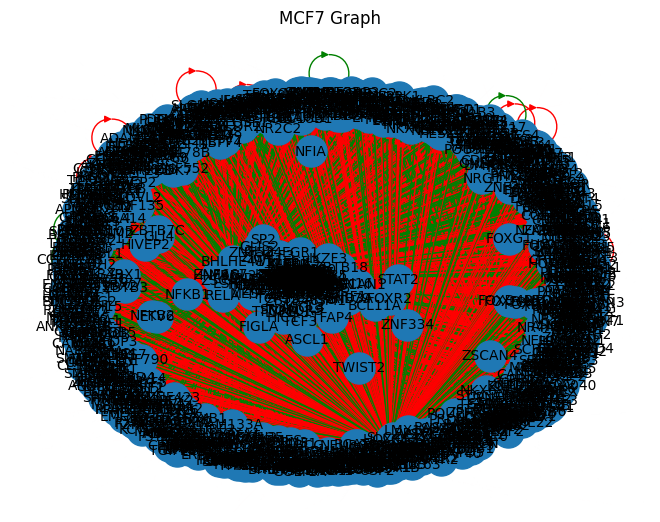

In [101]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph(graph, title):
    # Define edge colors based on annotations
    edge_colors = [
        "green" if graph[u][v]['type'] == "positive" else "red"
        for u, v in graph.edges
    ]

    # Draw the graph
    pos = nx.spring_layout(graph, seed=42)  # Spring layout for better visualization
    nx.draw(
        graph, pos, with_labels=True, edge_color=edge_colors, node_size=500, font_size=10
    )

    # Add a legend for edge colors
    plt.title(title)
    plt.show()

# Load the graphs
G_mcf7 = nx.read_graphml("mcf7_graph_with_annotations.graphml")
G_mda = nx.read_graphml("mda_mb231_graph_with_annotations.graphml")

# Visualize MCF7 graph
visualize_graph(G_mcf7, "MCF7 Graph")

# Visualize MDA-MB231 graph
#visualize_graph(G_mda, "MDA-MB231 Graph")


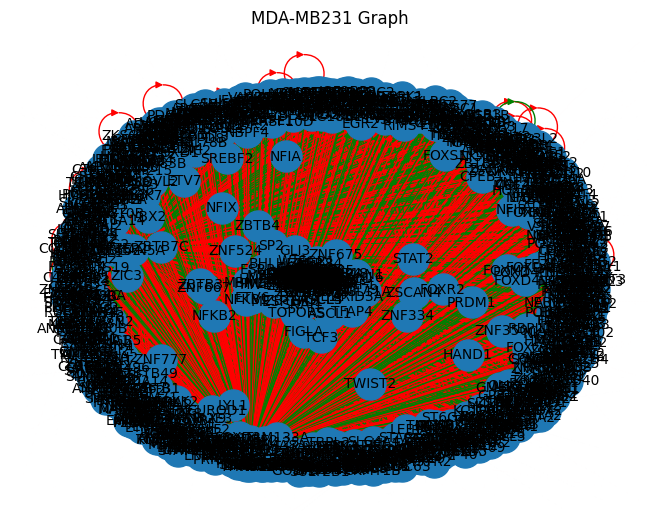

In [102]:
# Visualize MDA-MB231 graph
visualize_graph(G_mda, "MDA-MB231 Graph")

In [ ]:
print("Nodes in MCF7 graph:", G_mcf7.nodes(data=True))
print("Edges in MCF7 graph:", G_mcf7.edges(data=True))


In [ ]:
print("Nodes in MDA graph:", G_mda.nodes(data=True))
print("Edges in MDA graph:", G_mda.edges(data=True))


# Let's install PyGPS (suggested by Ortega) and use it for signal processing:

In [ ]:
pip install pygsp


# **1. Convert NetworkX Graph to PyGSP Graph**

In [ ]:
#I decided to use PyGSP package so few adjustments will be required
import networkx as nx
import pygsp as pg
from networkx import to_scipy_sparse_array

# Extract adjacency matrix from NetworkX graph
# Extract adjacency matrix from NetworkX graph as a sparse array
G_mcf7.remove_edges_from(nx.selfloop_edges(G_mcf7))##### remove the loop here so now I have 299 edges
adjacency_matrix_mcf7 = to_scipy_sparse_array(G_mcf7, weight=" Edge weight")

# Create PyGSP graph
gsp_graph_mcf7= pg.graphs.Graph(adjacency_matrix_mcf7)

# Display basic graph info
print(f"PyGSP Graph MCF7 with {gsp_graph_mcf7.N} nodes and {gsp_graph_mcf7.Ne} edges.")


In [ ]:
# Extract adjacency matrix from NetworkX graph for MDA
# Extract adjacency matrix from NetworkX graph as a sparse array
adjacency_matrix_mda = to_scipy_sparse_array(G_mda, weight=" Edge weight")

# Create PyGSP graph
gsp_graph_mda= pg.graphs.Graph(adjacency_matrix_mda)

# Display basic graph info
print(f"PyGSP Graph Negative with {gsp_graph_mda.N} nodes and {gsp_graph_mda.Ne} edges.")


since our positive graph has loops, i.e. gene strongly interacting with itself (may be acts as a dimer?), I decided to remove that loop for further analysis.


---




# **2.Compute the Laplacian Matrix**


In [ ]:
# Compute Laplacian (default is combinatorial) for MCF7 cells
gsp_graph_mcf7.compute_laplacian(lap_type="combinatorial")
laplacian = gsp_graph_mcf7.L

print("Laplacian Matrix MCF7:")
print(laplacian.toarray())  # Display dense matrix for small graphs


In [ ]:
# Compute Laplacian (default is combinatorial)
gsp_graph_neg.compute_laplacian(lap_type="combinatorial")
laplacian = gsp_graph_neg.L

print("Laplacian Matrix Neg:")
print(laplacian.toarray())  # Display dense matrix for small graphs


# 3. Assign Graph Signal
Assign RNa-seq data as the graph signal

In [ ]:
import pandas as pd

# Load RNA-seq data
rna_seq_data = pd.read_csv("/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/MCF_RNAseq_countsGSE208731.csv")  # Replace with your RNA-seq file
# Columns: gene, expression

# Extract genes from graphs
positive_genes = set(G_positive.nodes)
negative_genes = set(G_negative.nodes)
all_genes_in_graph = positive_genes.union(negative_genes)

# Filter RNA-seq data to include only relevant genes
filtered_rna_seq_data = rna_seq_data[rna_seq_data['Gene'].isin(all_genes_in_graph)]

# Verify the alignment
missing_genes = all_genes_in_graph - set(filtered_rna_seq_data['Gene'])
if missing_genes:
    print(f"Warning: The following genes are missing in the RNA-seq data: {missing_genes}")
else:
    print("All graph genes have corresponding RNA-seq data.")



In [ ]:
#average the expression data based on experimental coditions
import pandas as pd



# Averaging specific column groups and renaming them
column_groups = {
    "MCF7_2D_exp1": [1, 2, 3],      # Columns 1, 2, 3
    "MCF7_3D_exp1": [4, 5, 6],      # Columns 4, 5, 6
    "MCF7_2D_exp2": [7, 8, 9, 10, 11, 12],  # Columns 7 to 12
    "MCF7_3D_exp2": [13, 14, 15, 16, 17, 18]  # Columns 13 to 18
}

# Initialize a new DataFrame with the 'gene' column
averaged_data = filtered_rna_seq_data[['Gene']].copy()

# Compute averages for each group and add to the new DataFrame
for new_column, indices in column_groups.items():
    averaged_data[new_column] = rna_seq_data.iloc[:, indices].mean(axis=1).round(2)

# Save or inspect the resulting DataFrame
print(averaged_data.head())
averaged_data.to_csv("averaged_rna_seq_data.csv", index=False)


In [ ]:
import networkx as nx
import pandas as pd

#Load RNA-seq data
averaged_rna_seq_data = pd.read_csv("/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/averaged_rna_seq_data.csv")  # Replace with your RNA-seq file



# Ensure the RNA-seq data has a 'Gene' column and averaged columns (e.g., MCF7_2D_exp1, etc.)
# Create a mapping of genes to expression values for each condition

# Extract nodes for G_positive and G_negative
positive_genes = set(G_positive.nodes)
negative_genes = set(G_negative.nodes)

# Filter RNA-seq data for genes in G_positive and G_negative
positive_rna_seq = averaged_rna_seq_data[averaged_rna_seq_data['Gene'].isin(positive_genes)]
negative_rna_seq = averaged_rna_seq_data[averaged_rna_seq_data['Gene'].isin(negative_genes)]

# Create dictionaries for each graph and each condition
expression_dicts_positive = {
    condition: dict(zip(positive_rna_seq['Gene'], positive_rna_seq[condition]))
    for condition in averaged_rna_seq_data.columns[1:]  # Skip 'gene' column
}

expression_dicts_negative = {
    condition: dict(zip(negative_rna_seq['Gene'], negative_rna_seq[condition]))
    for condition in averaged_rna_seq_data.columns[1:]  # Skip 'gene' column
}

# Assign expression values to nodes in G_positive for a specific condition (example: MCF7_2D_exp1)
selected_condition = "MCF7_2D_exp1"  # Replace with the condition you want to use
nx.set_node_attributes(G_positive, expression_dicts_positive[selected_condition], name='expression')
nx.set_node_attributes(G_negative, expression_dicts_negative[selected_condition], name='expression')

# Verify attributes are set correctly
print("G_positive node attributes:")
for node, data in G_positive.nodes(data=True):
    print(node, data)

print("\nG_negative node attributes:")
for node, data in G_negative.nodes(data=True):
    print(node, data)


In [ ]:
# --- Convert to PyGSP ---
# Convert NetworkX graphs to PyGSP format
adjacency_matrix_positive = to_scipy_sparse_array(G_positive, weight=" Edge weight")
adjacency_matrix_negative = to_scipy_sparse_array(G_negative, weight="Edge weight")

gsp_graph_positive = pg.graphs.Graph(adjacency_matrix_positive)
gsp_graph_negative = pg.graphs.Graph(adjacency_matrix_negative)

# Extract RNA-seq expression as signal vectors for PyGSP
signal_positive = np.array([data['expression'] for _, data in G_positive.nodes(data=True)])
signal_negative = np.array([data['expression'] for _, data in G_negative.nodes(data=True)])

# Ensure signals match graph sizes
assert len(signal_positive) == gsp_graph_positive.N, "Positive graph signal length mismatch!"
assert len(signal_negative) == gsp_graph_negative.N, "Negative graph signal length mismatch!"

# Display signals
print("\nSignal (Positive Graph):", signal_positive[:5])  # Display first 5 for brevity
print("\nSignal (Negative Graph):", signal_negative[:5])  # Display first 5 for brevity

==========================================================================
Steps to Continue

--Compute Laplacians

Calculate the Laplacian matrices for both graphs using PyGSP.


--Analyze Signal Variation

Measure the variation of RNA-seq signals on the graph using
𝑆(𝑓)=𝑓𝑇𝐿𝑓
S(f)=**fTLf**.

--Optional: Visualize Signal Distribution

Plot the RNA-seq signals or their variations.


## 4 **Compute Laplacians**

In [ ]:
# Compute Laplacians for positive and negative graphs
gsp_graph_positive.compute_laplacian(lap_type="combinatorial")
gsp_graph_negative.compute_laplacian(lap_type="combinatorial")

# Access Laplacian matrices
laplacian_positive = gsp_graph_positive.L
laplacian_negative = gsp_graph_negative.L

print("\nLaplacian Matrix (Positive Graph):")
print(laplacian_positive.toarray()[:5, :5])  # Display first 5x5 for brevity

print("\nLaplacian Matrix (Negative Graph):")
print(laplacian_negative.toarray()[:5, :5])  # Display first 5x5 for brevity


# **5. Analyze Signal Variation**

In [ ]:
# Signal variation for positive and negative graphs
signal_variation_positive = signal_positive.T @ laplacian_positive @ signal_positive
signal_variation_negative = signal_negative.T @ laplacian_negative @ signal_negative

print(f"\nSignal Variation (Positive Graph): {signal_variation_positive}")
print(f"Signal Variation (Negative Graph): {signal_variation_negative}")


# 6.**Optional: Visualize Signal Distribution**

In [ ]:
import matplotlib.pyplot as plt

# Plot RNA-seq signals for positive graph
plt.figure(figsize=(10, 6))
plt.hist(signal_positive, bins=30, alpha=0.7, label="Positive Graph", color='blue')
plt.hist(signal_negative, bins=30, alpha=0.7, label="Negative Graph", color='orange')
plt.xlabel("RNA-seq Expression Level")
plt.ylabel("Frequency")
plt.title("Distribution of RNA-seq Expression Levels")
plt.legend()
plt.show()


# Next Steps
Clustering:
Perform spectral clustering using the eigenvalues and eigenvectors of the Laplacians.

Filtering:
Apply graph filters to smooth or enhance RNA-seq signals on the graphs.

Comparative Analysis:
Compare the results from the positive and negative graphs to identify key genes or regulatory patterns.

# **1. Clustering**
We’ll now perform spectral clustering using the eigenvalues and eigenvectors of the Laplacian matrices for the positive and negative graphs. This helps group nodes (genes) into clusters based on their connectivity patterns and RNA-seq signal variations.

Steps for Spectral Clustering:

A) Compute Eigenvalues and Eigenvectors

Use PyGSP to extract the Fourier basis (eigenvectors of the Laplacian) and corresponding eigenvalues.

B) Cluster Nodes

Use the eigenvectors corresponding to the smallest non-zero eigenvalues for clustering (spectral embedding).

C) Visualize Clustering

Optionally visualize clusters for insights.


In [ ]:
#Compute Eigenvalues and Eigenvectors

# Compute Fourier basis (eigenvalues and eigenvectors) for both graphs
gsp_graph_positive.compute_fourier_basis()
gsp_graph_negative.compute_fourier_basis()

eigvals_positive = gsp_graph_positive.e  # Eigenvalues
eigvecs_positive = gsp_graph_positive.U  # Eigenvectors

eigvals_negative = gsp_graph_negative.e  # Eigenvalues
eigvecs_negative = gsp_graph_negative.U  # Eigenvectors

# Display smallest eigenvalues (skip 0 for connected components)
print("\nEigenvalues (Positive Graph):", eigvals_positive[:10])  # First 10 for brevity
print("\nEigenvalues (Negative Graph):", eigvals_negative[:10])  # First 10 for brevity


In [ ]:
#Perform Spectral Clustering
#Use the eigenvectors associated with the smallest non-zero eigenvalues to cluster the nodes (genes).

from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 3

# Use first few eigenvectors (excluding the first constant eigenvector)
clusters_positive = KMeans(n_clusters=num_clusters).fit_predict(eigvecs_positive[:, 1:num_clusters+1])
clusters_negative = KMeans(n_clusters=num_clusters).fit_predict(eigvecs_negative[:, 1:num_clusters+1])

print("\nClusters (Positive Graph):", clusters_positive[:10])  # First 10 clusters for brevity
print("\nClusters (Negative Graph):", clusters_negative[:10])  # First 10 clusters for brevity)


In [ ]:
#Assign Clusters to Nodes
#Assign the cluster labels to nodes in the NetworkX graph for further exploration.

# Assign cluster labels as node attributes
nx.set_node_attributes(G_positive, dict(zip(G_positive.nodes, clusters_positive)), "cluster")
nx.set_node_attributes(G_negative, dict(zip(G_negative.nodes, clusters_negative)), "cluster")

# Verify node clusters
print("\nG_positive Clusters:")
for node, data in list(G_positive.nodes(data=True))[:5]:  # First 5 for brevity
    print(node, data)

print("\nG_negative Clusters:")
for node, data in list(G_negative.nodes(data=True))[:5]:  # First 5 for brevity
    print(node, data)




In [ ]:
#Visualize Clustering Results
#(Optional) You can visualize the clustering using a library like Matplotlib.

import matplotlib.pyplot as plt
import networkx as nx

# Visualize positive graph clustering
pos = nx.spring_layout(G_positive)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_positive, pos, node_size=50, node_color=clusters_positive, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_positive, pos, alpha=0.3)
plt.title("Clustering of Positive Graph Nodes")
plt.show()

# Visualize negative graph clustering
pos = nx.spring_layout(G_negative)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_negative, pos, node_size=50, node_color=clusters_negative, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_negative, pos, alpha=0.3)
plt.title("Clustering of Negative Graph Nodes")
plt.show()


In [ ]:
#Visualize Clustering Results
#(Optional) You can visualize the clustering using a library like Matplotlib.

import matplotlib.pyplot as plt
import networkx as nx

# Visualize positive graph clustering
pos = nx.spring_layout(G_positive)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_positive, pos, node_size=50, node_color=clusters_positive, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_positive, pos, alpha=0.5)
plt.title("Clustering of Positive Graph Nodes")
plt.show()

# Visualize negative graph clustering
pos = nx.spring_layout(G_negative)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_negative, pos, node_size=50, node_color=clusters_negative, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_negative, pos, alpha=0.5)
plt.title("Clustering of Negative Graph Nodes")
plt.show()


# Lets try to identify the positive graph with stronger interaction hub depicted with thicker edges

# 1. Identify the Hub Node
# The hub node is likely the node with the highest degree or the strongest total edge weight. You can calculate these metrics:

# Degree Centrality (Number of Connections)

In [ ]:
# Get degree centrality for G_positive
degree_centrality = nx.degree_centrality(G_positive)

# Sort nodes by degree centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Display the top nodes
print("Top Nodes by Degree Centrality (Positive Graph):")
for node, centrality in sorted_degree[:5]:  # Top 5 nodes
    print(f"Node: {node}, Degree Centrality: {centrality}")


In [ ]:
# Compute strength (sum of edge weights) for each node
strength = {node: sum(data["weight"] for _, _, data in G_positive.edges(node, data=True)) for node in G_positive.nodes()}

# Sort nodes by strength
sorted_strength = sorted(strength.items(), key=lambda x: x[1], reverse=True)

# Display the top nodes
print("\nTop Nodes by Strength (Edge Weights, Positive Graph):")
for node, weight in sorted_strength[:5]:  # Top 5 nodes
    print(f"Node: {node}, Strength (Sum of Weights): {weight}")


# **2. Identify Genes and TFs Connected to the Hub**
# Once you identify the hub node, find all nodes connected to it and analyze their edge weights:

In [ ]:
# Get the top hub node (by strength or degree centrality)
top_hub_node = sorted_strength[0][0]  # Replace with your preferred metric

# Get neighbors (connected nodes) of the hub
neighbors = G_positive[top_hub_node]

print(f"\nNeighbors of Hub Node ({top_hub_node}):")
for neighbor, edge_data in neighbors.items():
    print(f"Connected Node: {neighbor}, Edge Weight: {edge_data['weight']}")


In [ ]:
top_hub_node = sorted_degree[0][0]  # Use degree centrality to select the hub
# Get neighbors (connected nodes) of the hub
neighbors = G_positive[top_hub_node]

print(f"\nNeighbors of Hub Node ({top_hub_node}):")
for neighbor, edge_data in neighbors.items():
    print(f"Connected Node: {neighbor}, Edge Weight: {edge_data['weight']}")

# **3. Visualize the Hub and Its Connections**
# You can highlight the hub and its neighbors in a graph visualization:

In [ ]:
import matplotlib.pyplot as plt

# Get the subgraph for the hub and its neighbors
hub_subgraph = G_positive.subgraph([top_hub_node] + list(neighbors.keys()))

# Visualize the subgraph
pos = nx.spring_layout(hub_subgraph)  # Layout for visualization
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(hub_subgraph, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(hub_subgraph, pos, width=[d["weight"] for (_, _, d) in hub_subgraph.edges(data=True)])
nx.draw_networkx_labels(hub_subgraph, pos, font_size=10)
plt.title(f"Hub Node ({top_hub_node}) and Its Connections")
plt.show()


# **4. Export Hub Connections for Further Analysis**
# If you want to analyze this data outside Python, export the hub’s connections to a file:

In [ ]:
import pandas as pd

# Create a DataFrame for the hub's connections
hub_connections = pd.DataFrame({
    "TF": [top_hub_node] * len(neighbors),
    "Gene": list(neighbors.keys()),
    "Edge Weight": [data["weight"] for _, data in neighbors.items()]
})

# Save to CSV
hub_connections.to_csv("hub_connections_positive.csv", index=False)
print("\nHub connections exported to 'hub_connections_positive.csv'")
